<h1><center>FAKE NEWS DETECTION</center></h1>

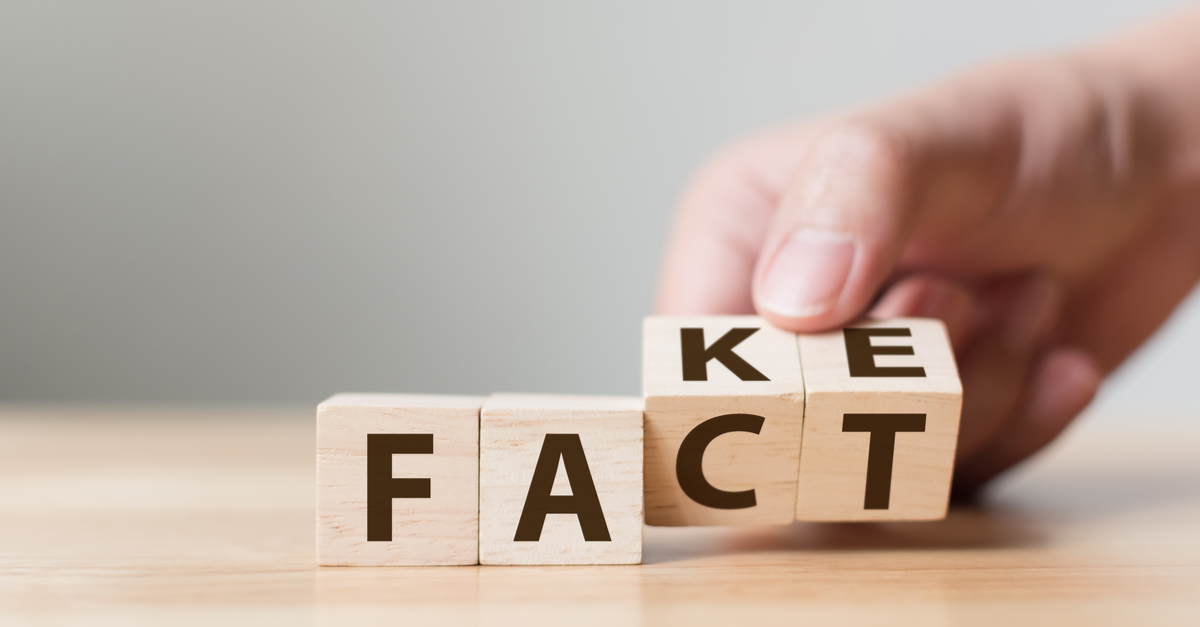

## Abstract

Fake news is false or misleading information presented as news. It often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. However, the term does not have a fixed definition, and has been applied more broadly to include any type of false information, including unintentional and unconscious mechanisms, and also by high-profile individuals to apply to any news unfavourable to their personal perspectives. Hence, there are machine learning based algorithm used to detect the fake news in the online websites. some the research works identify this problem and gives the solution to detect fake news. In this paper, we proposed the Logistic regression based approach to build the model with higher accuracy. For the end product, We uses Django based web application.

## Introduction 

Over the past several years, fake news dissemination has become a major problem. Fake news is defined by the New York Times as "made-up stories are written to deceive", and they are published in formats similar to those used by traditional news agencies (Pan, Pavlova, Li, Li, Li and Liu, 2018). Fake news has been identified for contributing to increased political polarization and partisan conflict in recent times. Recent examples included the controversy created during the 2016 presidential campaign for the United States (Pan et al., 2018) and Indian Airstrike in Balakot in 2019. Fake news is a text classification issue with a straight forward proposition (Shu, Sliva, Wang, Tang and Liu, 2017). Building a robust AI framework that can distinguish between "Genuine" news and "Fake" news is required to identify fake news (Pan et al., 2018; Shu et al., 2017). It is a challenging task for social media platforms such as Facebook®, Twitter®, etc. to identify the authentic content (Shu et al., 2017) within the large volume of data posted by the users. There exists a huge risk of posting and publishing such fake and non-authentic content over social media platforms. This research is a positive step towards addressing this critical issue. Figure 1 shows a few examples of fake news which spread over social media platforms during the 2016 U.S. Presidential General Election (Shu et al., 2017). These fake news hampered the public emotionally and spread a negative impact (Persily, 2017) on the society during the 2016 U.S. Presidential General Election. The recent researches (Shu et al., 2017; Pan et al., 2018; Kumar and Shah, 2018) that have been done in the area of detecting fake news are based on both supervised as well as unsupervised methods (Dougherty, Kohavi and Sahami, 1995).

   Almost all unsupervised methods for learning word representations use the statistics of word occurrences in a corpus as the primary source of information (Kumar and Shah, 2018), (Mikolov, Chen, Corrado and Dean, 2013a). Deducing relevant meaning from these statistics and representing them using the resultant word vectors is a problem to be addressed (Mikolov et al., 2013a). Another notable model that takes in vectors or words from their co-occurrence data is Global Vectors (GloVe) (Fu, Liu, Xu and Cui, 2017). The GloVe is a count-based model for pre-training. The algorithms of word representations (Pennington, Socher and Manning, 2014) can be divided into two main streams, i.e. statistics-based LDA (Linear discriminant analysis) (Zhang and Wallace, 2015) and learning-based (Word2Vec). LDA produces low dimensional word vectors by singular value decomposition (SVD) (Caliskan, Bryson and Narayanan, 2017) on the co-occurrence matrix, while Word2Vec employs a three-layer neural network to do centre-context word pair classification task, where word vectors are the by-products. Word2vec is a predictive model, a feed-forward neural system that learns vectors to improve the predictive capacity (Fu et al., 2017). An attractive feature of Word2Vec algorithm is that the similar words are located together in the vector space, and arithmetic operations on word vectors can pose semantic or syntactic relationships (Zhang and Wallace, 2015; Caliskan et al., 2017). Besides being intuitive, the count-based model also provides an encoding function which can be used to infer unseen words or phrases.

## Motivation & Research Gap

Fake news detection is one of the emerging topics that has caught the attention of researchers across the world in the field of artificial intelligence. Despite receiving significant attention in the research community, fake news detection accuracy has not improve significantly due to insufficient context-specific news data.

## solution

In the Proposed method, We uses **Logistic regression** in order to build the model with better accuracy and able to work with different kinf of dataset.

## proposed method

In [55]:
## import needed packages

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import pickle
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print('Dependencies Loaded Successfully')

Dependencies Loaded Successfully


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing the stopwords


import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chandru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
## Importing train and test data

news_data = pd.read_csv('train/train.csv')
news_data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [16]:
test_data = pd.read_csv('test/test.csv')
test_data.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?


In [17]:
## shape of the data set

news_data.shape

(20800, 5)

In [18]:
## label count

print(news_data['label'].value_counts())

1    10413
0    10387
Name: label, dtype: int64


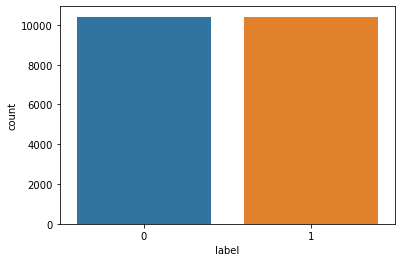

In [19]:
##  plot the count value 

sns.countplot(x ='label', data = news_data)
 
# Show the plot
plt.show()

**From the above plot** the data for the fake news and normal news are aproximately equal. 

In [20]:
#3 checking the missing values 

news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [21]:
## fill na value with empty 

news_data = news_data.fillna('unknown')

In [22]:
#3 checking the missing values 

news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [23]:
print(news_data['author'].value_counts().head(10))

unknown                1957
Pam Key                 243
admin                   193
Jerome Hudson           166
Charlie Spiering        141
John Hayward            140
Katherine Rodriguez     124
Warner Todd Huston      122
Ian Hanchett            119
Breitbart News          118
Name: author, dtype: int64


In [24]:
#merging the author name and news title 

news_data['content'] = news_data['author']+' '+news_data['title']

In [25]:
## NLP process

port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [26]:
## process the dataset

news_data['content'] = news_data['content'].apply(stemming)

In [27]:
## show the processed data

print(news_data['content'].head())

0    darrel lucu hous dem aid even see comey letter...
1    daniel j flynn flynn hillari clinton big woman...
2               consortiumnew com truth might get fire
3    jessica purkiss civilian kill singl us airstri...
4    howard portnoy iranian woman jail fiction unpu...
Name: content, dtype: object


In [28]:
# Seperating the data and the label 

X = news_data['content'].values
Y = news_data['label'].values

In [29]:
# converting the textual data into numerical data 


vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [34]:
##print(X)

## Train test Split

In [30]:
## train test split 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

## Logistic Regression 

In [35]:
## build the model

model = LogisticRegression()

In [36]:
## train the model

model.fit(X_train, Y_train)

LogisticRegression()

## Performance Evaluation

In [38]:
## evaluation metrix
## train data accuracy score

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of training data :', training_data_accuracy)

In [41]:
## test data accuracy

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of testing data :', testing_data_accuracy)

In [45]:
## print the precision score

precision_score_ = precision_score(Y_test, X_test_prediction)
print("Precision score of the test data :", precision_score_)

Precision score of the test data : 0.9754948162111216


In [47]:
## print the F1 score

f1_score_ = f1_score(Y_test, X_test_prediction)
print("Precision score of the test data :", f1_score_)

Precision score of the test data : 0.9845422116527942


In [51]:
## print the F1 score

recall_ = recall_score(Y_test, X_test_prediction)
print("Precision score of the test data :", recall_)

Precision score of the test data : 0.9937590014402304


In [54]:
## outputframe

data = [['accuracy', testing_data_accuracy*100], ['Precision', precision_score_*100], ['F1 score', f1_score_*100], ['Recall', recall_*100]]
output = pd.DataFrame(data, columns = ['Performance', 'Value for 100%'])
output

,Performance,Value for 100%
0,accuracy,98.437500
1,Precision,97.549482
2,F1 score,98.454221
3,Recall,99.375900


**The accuracy of the model in traing data is 99.11% and the accuracy of the model in testing data is 98.46%. while compared with other existing methods, the propsoed logistic rgression based method performs well in terms of accuracy, F1 score, Presision score and Recall.**

## Save model

In [58]:
## create final model
final_model = LogisticRegression()
final_model.fit(X, Y)

## load the model
filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

<h1><center>The End</center></h1>




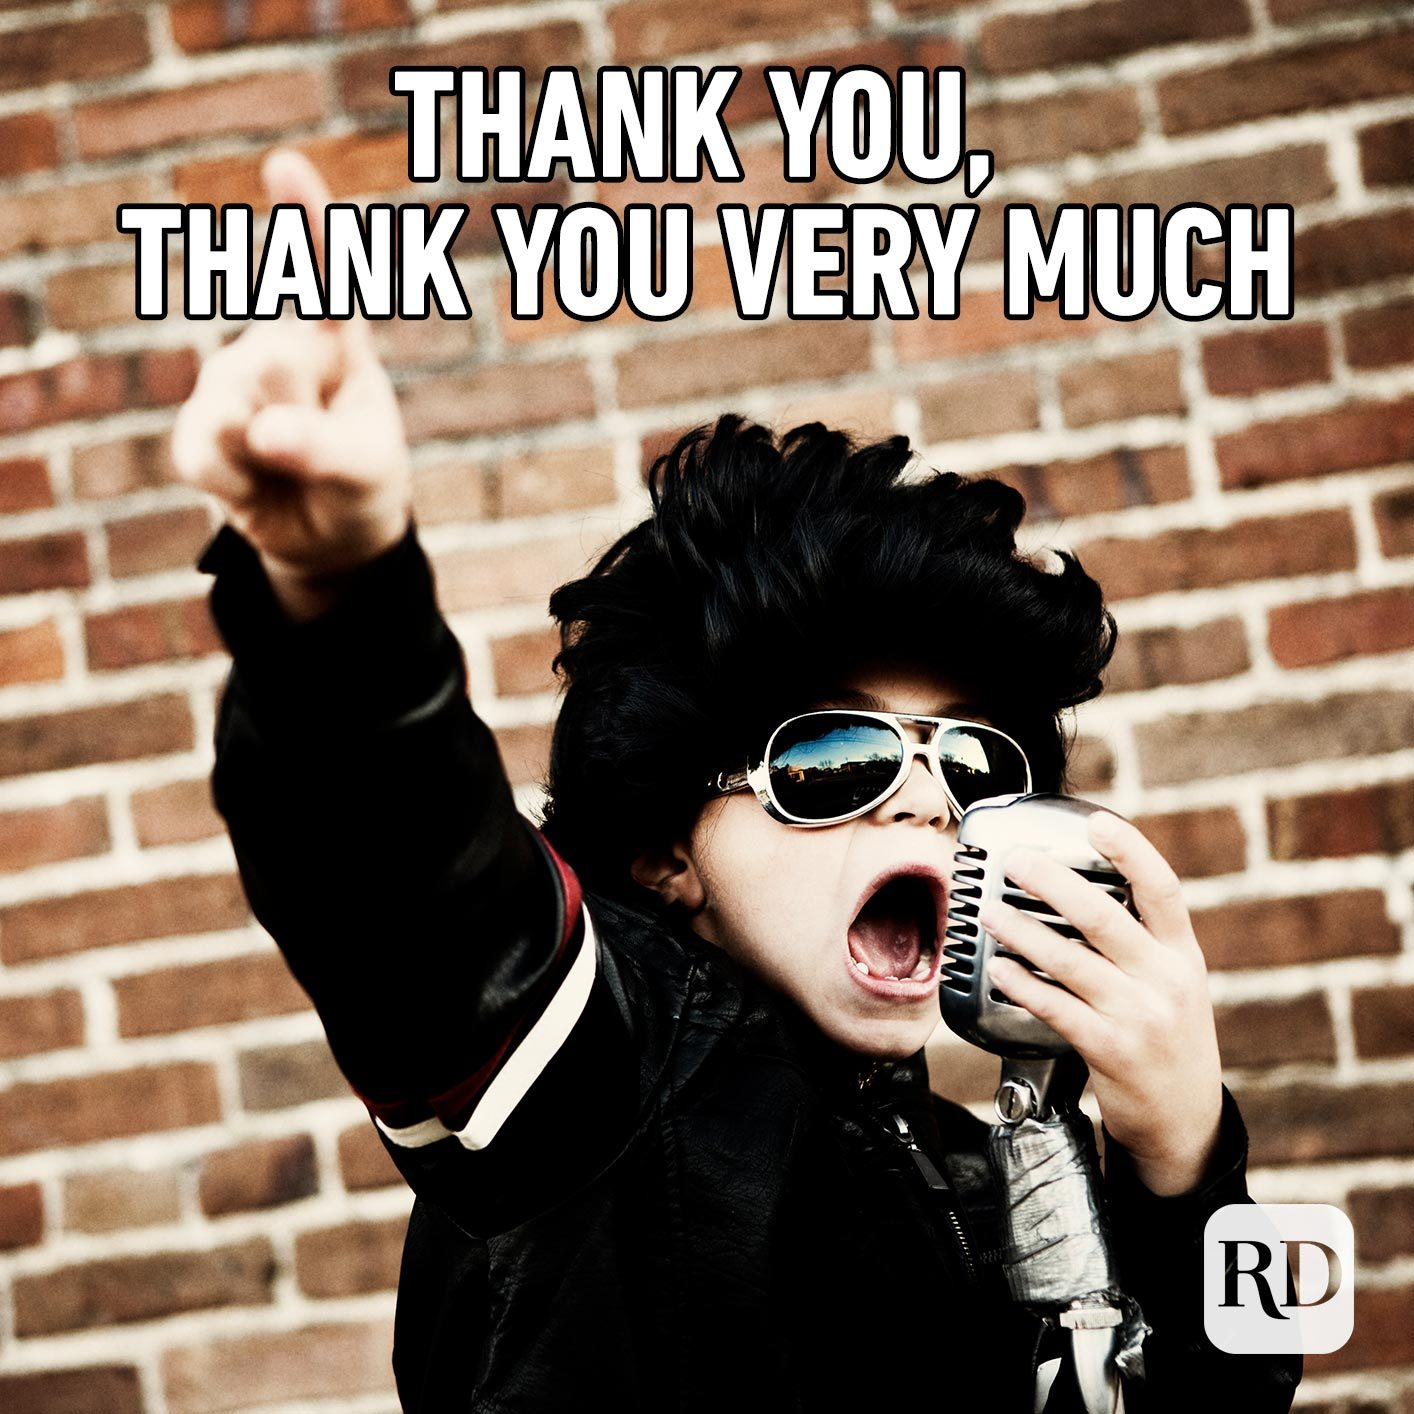